In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-phone-rating/mobile phone rating by dxo.csv


In [2]:
phone = pd.read_csv("/kaggle/input/mobile-phone-rating/mobile phone rating by dxo.csv")
phone

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0
...,...,...,...,...,...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020,NaN,NaN,NaN,NaN,73.0
219,Wiko Power U20,$159,Jan 2021,NaN,NaN,NaN,NaN,70.0
220,Motorola Moto G9 Power,$229,Nov 2020,NaN,NaN,NaN,NaN,70.0
221,Realme C11,$119,Jun 2020,NaN,NaN,NaN,NaN,61.0


In [3]:
phone.dtypes

model       object
price       object
launch      object
camera     float64
selfie     float64
audio      float64
display    float64
battery    float64
dtype: object

# General description

In [4]:
phone.describe()

,camera,selfie,audio,display,battery
count,184.000000,72.000000,93.000000,64.000000,54.000000
mean,106.445652,87.069444,65.451613,82.375000,74.351852
std,17.605801,14.862114,8.482099,10.173885,11.093356
min,56.000000,22.000000,41.000000,43.000000,49.000000
25%,94.000000,80.750000,60.000000,78.750000,66.250000
50%,108.000000,91.000000,66.000000,85.500000,74.500000
75%,119.000000,98.000000,71.000000,89.000000,84.750000
max,144.000000,106.000000,81.000000,99.000000,96.000000


# General info

In [5]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    223 non-null    object 
 1   price    223 non-null    object 
 2   launch   223 non-null    object 
 3   camera   184 non-null    float64
 4   selfie   72 non-null     float64
 5   audio    93 non-null     float64
 6   display  64 non-null     float64
 7   battery  54 non-null     float64
dtypes: float64(5), object(3)
memory usage: 14.1+ KB


---
# Exploitation
---
## Converting price to float type

In [6]:
phone["price (Dollar US)"] = phone["price"][:].str.slice(start=1).astype(float)
phone["price (Dollar US)"].dtypes

dtype('float64')

# Filling NaN values

In [7]:
for column_name in phone.columns:
    if phone[column_name].dtype == 'float64':
        phone[column_name].fillna(0, inplace=True)

In [8]:
phone.isnull()

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False
219,False,False,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False,False,False
221,False,False,False,False,False,False,False,False,False


In [9]:
phone.describe()

,camera,selfie,audio,display,battery,price (Dollar US)
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,87.829596,28.112108,27.295964,23.641256,18.004484,698.228700
std,43.565087,41.659614,32.802471,37.738151,32.379854,327.153319
min,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000
25%,84.000000,0.000000,0.000000,0.000000,0.000000,459.500000
50%,103.000000,0.000000,0.000000,0.000000,0.000000,699.000000
75%,117.000000,78.500000,65.500000,72.000000,0.000000,899.000000
max,144.000000,106.000000,81.000000,99.000000,96.000000,1999.000000


# Retrieving launch years

In [10]:
phone["launch_year"] = phone["launch"][:].str.slice(start=4).astype(int)
phone.launch_year.dtype

dtype('int64')

---
# 10 best mobile phones

In [11]:
phone.sort_values(by=['selfie', 'camera', 'audio', 'display', 'battery', 'price (Dollar US)'], ascending=False).head(10)

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,0.0,93.0,0.0,907.0,2021
5,Huawei Mate 40 Pro,$1199,Oct 2020,136.0,104.0,0.0,0.0,0.0,1199.0,2020
11,Huawei P40 Pro,$1099,Mar 2020,132.0,103.0,59.0,85.0,0.0,1099.0,2020
6,Google Pixel 6 Pro,$899,Oct 2021,135.0,102.0,71.0,90.0,0.0,899.0,2021
64,Asus ZenFone 7 Pro,$799,Dec 2020,115.0,101.0,0.0,0.0,0.0,799.0,2020
22,Samsung Galaxy S20 Ultra 5G (Exynos),$1359,Feb 2020,126.0,100.0,69.0,87.0,0.0,1359.0,2020
35,Samsung Galaxy S21 Ultra 5G (Exynos),$1259,Jan 2021,121.0,100.0,70.0,91.0,57.0,1259.0,2021
41,Samsung Galaxy Note20 Ultra 5G (Exynos),$1309,Aug 2020,120.0,100.0,68.0,89.0,0.0,1309.0,2020
40,Samsung Galaxy Note20 (Exynos),$959,Aug 2020,120.0,100.0,0.0,0.0,0.0,959.0,2020
184,Huawei nova 6 5G,$576,Dec 2019,0.0,100.0,0.0,0.0,0.0,576.0,2019


# Top 10 phones having the highest price

In [12]:
phone.sort_values(by='price (Dollar US)', ascending=False).head(10)

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year
90,Samsung Galaxy Z Fold2 5G,$1999,Aug 2020,109.0,0.0,66.0,0.0,0.0,1999.0,2020
26,Samsung Galaxy Z Fold3 5G,$1799,Aug 2021,124.0,0.0,72.0,89.0,0.0,1799.0,2021
8,Asus Smartphone for Snapdragon Insiders,$1499,Jul 2021,133.0,0.0,77.0,0.0,0.0,1499.0,2021
202,Motorola Razr,$1499,Nov 2020,0.0,0.0,57.0,0.0,0.0,1499.0,2020
207,Microsoft Surface Duo,$1399,Aug 2020,0.0,0.0,0.0,74.0,0.0,1399.0,2020
107,Samsung Galaxy Z Flip,$1380,Feb 2020,105.0,83.0,0.0,0.0,0.0,1380.0,2020
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,0.0,0.0,0.0,0.0,1363.0,2020
22,Samsung Galaxy S20 Ultra 5G (Exynos),$1359,Feb 2020,126.0,100.0,69.0,87.0,0.0,1359.0,2020
41,Samsung Galaxy Note20 Ultra 5G (Exynos),$1309,Aug 2020,120.0,100.0,68.0,89.0,0.0,1309.0,2020
54,Samsung Galaxy Note20 Ultra 5G (Snapdragon),$1299,Aug 2020,117.0,97.0,68.0,90.0,0.0,1299.0,2020


# 10 phones having the lowest price

In [13]:
phone.sort_values(by='price (Dollar US)', ascending=True).head(10)

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year
188,Intex Aqua Selfie,$89,Jul 2017,0.0,22.0,0.0,0.0,0.0,89.0,2017
221,Realme C11,$119,Jun 2020,0.0,0.0,0.0,0.0,61.0,119.0,2020
209,Realme C21,$119,Mar 2021,0.0,0.0,0.0,43.0,62.0,119.0,2021
176,Lava Z25,$154,Mar 2017,70.0,0.0,0.0,0.0,0.0,154.0,2017
183,Altice S61,$159,Jun 2018,56.0,0.0,0.0,0.0,0.0,159.0,2018
222,Xiaomi Redmi 9,$159,Jun 2020,0.0,0.0,0.0,0.0,54.0,159.0,2020
219,Wiko Power U20,$159,Jan 2021,0.0,0.0,0.0,0.0,70.0,159.0,2021
213,Wiko Power U30,$179,Apr 2021,0.0,0.0,0.0,0.0,86.0,179.0,2021
146,Samsung Galaxy A12,$179,Nov 2020,90.0,0.0,0.0,0.0,0.0,179.0,2020
140,Xiaomi Redmi Note 10S,$199,Mar 2021,92.0,0.0,0.0,0.0,86.0,199.0,2021


# 10 records with the lowest notation

In [14]:
phone.sort_values(by=['selfie', 'camera', 'audio', 'display', 'battery', 'price (Dollar US)'], ascending=True).head(10)

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year
222,Xiaomi Redmi 9,$159,Jun 2020,0.0,0.0,0.0,0.0,54.0,159.0,2020
221,Realme C11,$119,Jun 2020,0.0,0.0,0.0,0.0,61.0,119.0,2020
219,Wiko Power U20,$159,Jan 2021,0.0,0.0,0.0,0.0,70.0,159.0,2021
220,Motorola Moto G9 Power,$229,Nov 2020,0.0,0.0,0.0,0.0,70.0,229.0,2020
218,Huawei P40 Lite,$279,Feb 2020,0.0,0.0,0.0,0.0,73.0,279.0,2020
217,Vivo Y20s,$199,Oct 2020,0.0,0.0,0.0,0.0,75.0,199.0,2020
216,Oppo A54 5G,$259,Apr 2021,0.0,0.0,0.0,0.0,76.0,259.0,2021
215,Xiaomi Redmi Note 10 5G,$229,Mar 2021,0.0,0.0,0.0,0.0,78.0,229.0,2021
214,Oppo A74 5G,$299,Apr 2021,0.0,0.0,0.0,0.0,78.0,299.0,2021
213,Wiko Power U30,$179,Apr 2021,0.0,0.0,0.0,0.0,86.0,179.0,2021


# Plotting and comparison

## Retrieving different kind of phone brands

In [15]:
def get_type(column):
    brands = list()
    for model_name in column:
        brands.append(model_name.split(' ')[0])

    return pd.Series(brands)

In [16]:
phone_brands = get_type(phone['model'])
phone_brands

0        Huawei
1        Xiaomi
2        Huawei
3         Apple
4         Apple
         ...   
218      Huawei
219        Wiko
220    Motorola
221      Realme
222      Xiaomi
Length: 223, dtype: object

In [17]:
print(f"There are {len(phone_brands.unique())} brands")
phone_brands.value_counts()

There are 33 brands


Samsung      38
Xiaomi       27
Apple        18
Oppo         17
Huawei       13
OnePlus      12
Vivo         11
Google       10
Asus          9
Motorola      8
Realme        7
LG            6
Sony          5
Black         5
Nokia         4
Honor         4
Nubia         3
Lenovo        3
Wiko          3
Meitu         2
Fairphone     2
HTC           2
Crosscall     2
ZTE           2
TCL           2
Vsmart        1
Meizu         1
Lava          1
General       1
POCO          1
Altice        1
Intex         1
Microsoft     1
dtype: int64

---
## Retrieving every phone's brand name

In [18]:
phone['brands'] = phone_brands[:].str.lower()
phone

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year,brands
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,0.0,93.0,0.0,907.0,2021,huawei
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200.0,2021,xiaomi
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,0.0,0.0,0.0,0.0,1363.0,2020,huawei
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099.0,2021,apple
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0,999.0,2021,apple
...,...,...,...,...,...,...,...,...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020,0.0,0.0,0.0,0.0,73.0,279.0,2020,huawei
219,Wiko Power U20,$159,Jan 2021,0.0,0.0,0.0,0.0,70.0,159.0,2021,wiko
220,Motorola Moto G9 Power,$229,Nov 2020,0.0,0.0,0.0,0.0,70.0,229.0,2020,motorola
221,Realme C11,$119,Jun 2020,0.0,0.0,0.0,0.0,61.0,119.0,2020,realme


# Counting phones by brand

In [19]:
phone['brands'].value_counts()

samsung      38
xiaomi       27
apple        18
oppo         17
huawei       13
oneplus      12
vivo         11
google       10
asus          9
motorola      8
realme        7
lg            6
sony          5
black         5
nokia         4
honor         4
nubia         3
lenovo        3
wiko          3
meitu         2
fairphone     2
htc           2
crosscall     2
zte           2
tcl           2
vsmart        1
meizu         1
lava          1
general       1
poco          1
altice        1
intex         1
microsoft     1
Name: brands, dtype: int64

# Retrieving release month

In [20]:
phone["release month"] = phone["launch"][:].str[:4]
phone

,model,price,launch,camera,selfie,audio,display,battery,price (Dollar US),launch_year,brands,release month
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,0.0,93.0,0.0,907.0,2021,huawei,Jul
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200.0,2021,xiaomi,Mar
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,0.0,0.0,0.0,0.0,1363.0,2020,huawei,Oct
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099.0,2021,apple,Sep
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0,999.0,2021,apple,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020,0.0,0.0,0.0,0.0,73.0,279.0,2020,huawei,Feb
219,Wiko Power U20,$159,Jan 2021,0.0,0.0,0.0,0.0,70.0,159.0,2021,wiko,Jan
220,Motorola Moto G9 Power,$229,Nov 2020,0.0,0.0,0.0,0.0,70.0,229.0,2020,motorola,Nov
221,Realme C11,$119,Jun 2020,0.0,0.0,0.0,0.0,61.0,119.0,2020,realme,Jun


## Counting releases per month

In [21]:
phone["release month"].value_counts()

Mar     37
Sep     34
Oct     30
Aug     20
Apr     20
Feb     18
May     16
Jul     13
Jan     11
Jun     10
Dec      7
Nov      7
Name: release month, dtype: int64

---
# Observations about prices, battery and camera quality over years and months

<AxesSubplot:title={'center':'Camera quality over years'}, xlabel='launch_year', ylabel='camera'>

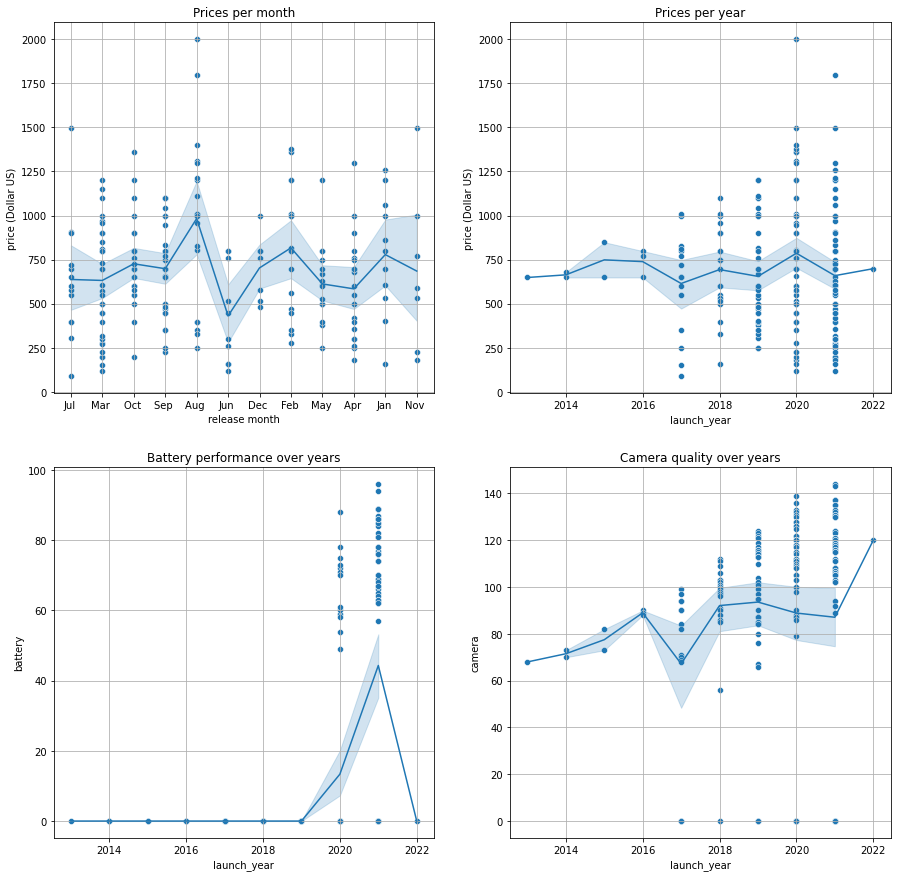

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Setting grids
for i in range(2):
    for j in range(2):
        ax[i][j].grid(True)

# phone releases per month
ax[0][0].set_title('Prices per month')
sns.scatterplot(ax=ax[0][0], x=phone["release month"], y=phone['price (Dollar US)'])
sns.lineplot(ax=ax[0][0], x=phone["release month"], y=phone['price (Dollar US)'])

# phone prices per release year
ax[0][1].set_title('Prices per year')
sns.scatterplot(ax=ax[0][1], x=phone['launch_year'], y=phone['price (Dollar US)'])
sns.lineplot(ax=ax[0][1], x=phone['launch_year'], y=phone['price (Dollar US)'])

# phone battery performance over years
ax[1][0].set_title("Battery performance over years")
sns.scatterplot(ax=ax[1][0], x=phone['launch_year'], y=phone['battery'])
sns.lineplot(ax=ax[1][0], x=phone['launch_year'], y=phone['battery'])

# Camera quality over years
ax[1][1].set_title('Camera quality over years')
sns.scatterplot(ax=ax[1][1], x=phone['launch_year'], y=phone['camera'])
sns.lineplot(ax=ax[1][1], x=phone['launch_year'], y=phone['camera'])

# Release per year of each brand

In [23]:
release_per_year = pd.crosstab(phone.brands, phone.launch_year)
release_per_year

launch_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
brands,,,,,,,,,,
altice,0,0,0,0,0,1,0,0,0,0
apple,1,1,0,1,2,2,2,5,4,0
asus,0,0,0,0,0,1,2,2,4,0
black,0,0,0,0,0,0,2,1,2,0
crosscall,0,0,0,0,0,1,0,1,0,0
fairphone,0,0,0,0,0,0,1,0,1,0
general,0,0,0,0,0,0,1,0,0,0
google,0,0,1,1,1,1,2,2,2,0
honor,0,0,0,0,0,0,2,1,1,0


In [24]:
release_per_year.describe()

launch_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.030303,0.060606,0.060606,0.090909,0.454545,0.666667,1.242424,1.969697,2.151515,0.030303
std,0.174078,0.242306,0.242306,0.291937,0.665719,0.989529,1.392621,2.698204,3.270333,0.174078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,6.000000,13.000000,12.000000,1.000000


<AxesSubplot:xlabel='launch_year', ylabel='brands'>

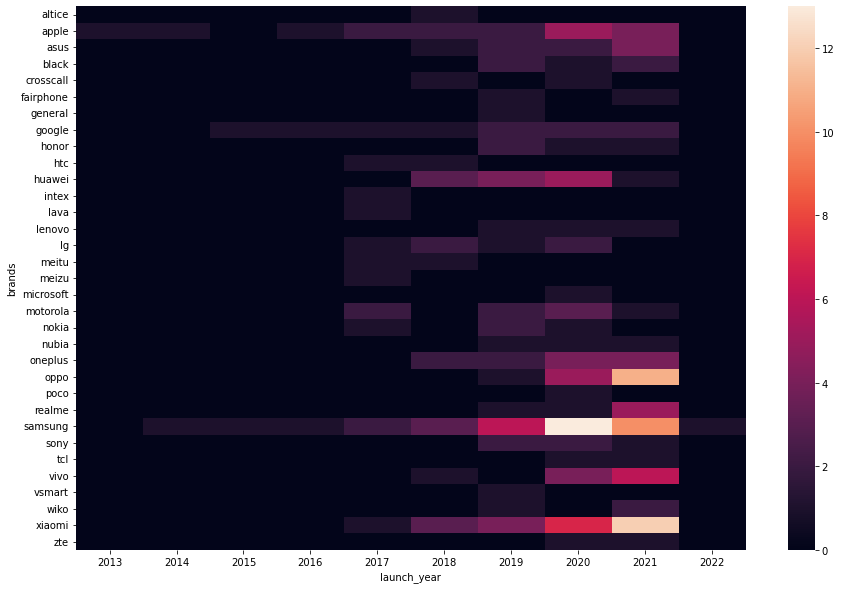

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data=release_per_year)

# Release per month of each brand

In [26]:
release_per_month = pd.crosstab(phone.brands, phone['release month'])
release_per_month

release month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
brands,,,,,,,,,,,,
altice,0,0,0,0,0,0,1,0,0,0,0,0
apple,1,0,0,0,0,0,0,0,0,1,4,12
asus,0,2,1,0,0,1,0,2,3,0,0,0
black,0,0,0,0,0,1,0,3,0,0,1,0
crosscall,0,0,0,1,0,0,0,0,0,0,1,0
fairphone,0,0,0,0,0,0,0,0,0,0,1,1
general,0,0,0,0,1,0,0,0,0,0,0,0
google,0,1,0,0,0,0,0,0,1,0,7,1
honor,1,1,0,0,0,0,0,0,1,1,0,0


In [27]:
release_per_month.describe()

release month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.606061,0.606061,0.212121,0.545455,0.333333,0.393939,0.303030,1.121212,0.484848,0.212121,0.909091,1.030303
std,0.933387,1.951592,0.484612,1.371380,1.241639,0.609272,0.529437,2.042633,0.972150,0.484612,1.548460,2.157615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,4.000000,11.000000,2.000000,7.000000,7.000000,2.000000,2.000000,9.000000,4.000000,2.000000,7.000000,12.000000


<AxesSubplot:xlabel='release month', ylabel='brands'>

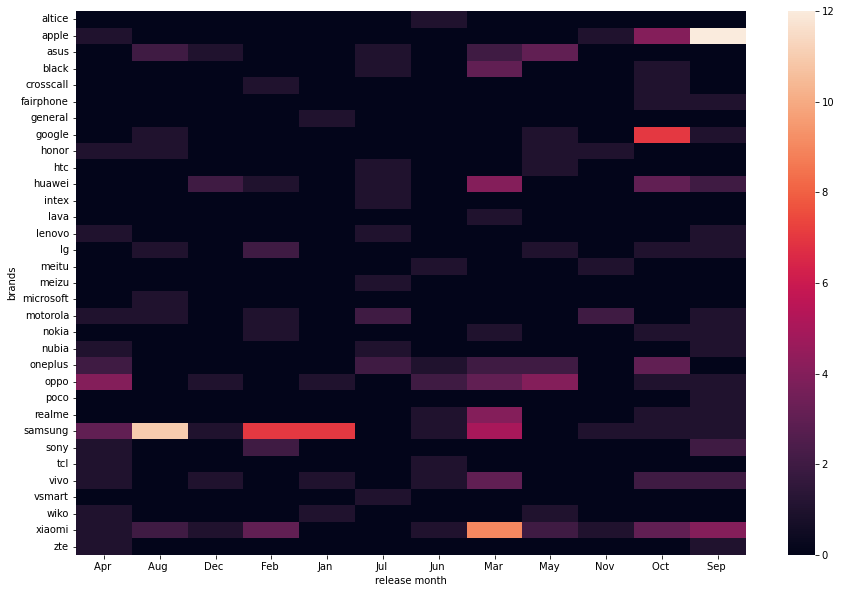

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data=release_per_month)

# Camera, selfie, and battery quality given prices

<AxesSubplot:title={'center':'Camera-selfie ratio'}, xlabel='camera', ylabel='selfie'>

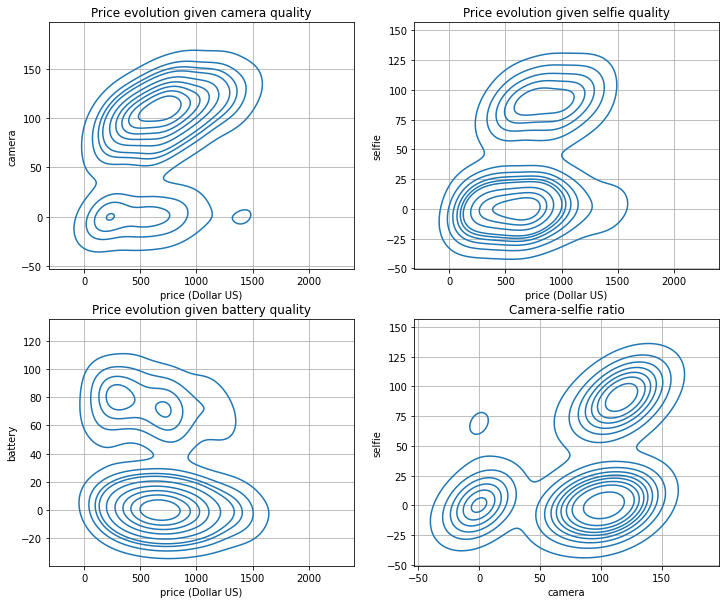

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i in range(2):
    for j in range(2):
        ax[i][j].grid(True)

# Camero <=> Price plotting
ax[0][0].set_title("Price evolution given camera quality")
sns.kdeplot(x=phone['price (Dollar US)'], y=phone.camera, ax=ax[0][0])

# Selfie <=> price plotting
ax[0][1].set_title("Price evolution given selfie quality")
sns.kdeplot(x=phone['price (Dollar US)'], y=phone['selfie'], ax=ax[0][1])

# Battery <=> price plotting
ax[1][0].set_title("Price evolution given battery quality")
sns.kdeplot(x=phone['price (Dollar US)'], y=phone["battery"], ax=ax[1][0])

# Camera <=> selfie plotting
ax[1][1].set_title("Camera-selfie ratio")
sns.kdeplot(x=phone.camera, y=phone.selfie, ax=ax[1][1])

# Camera, selfie, and battery quality per brand

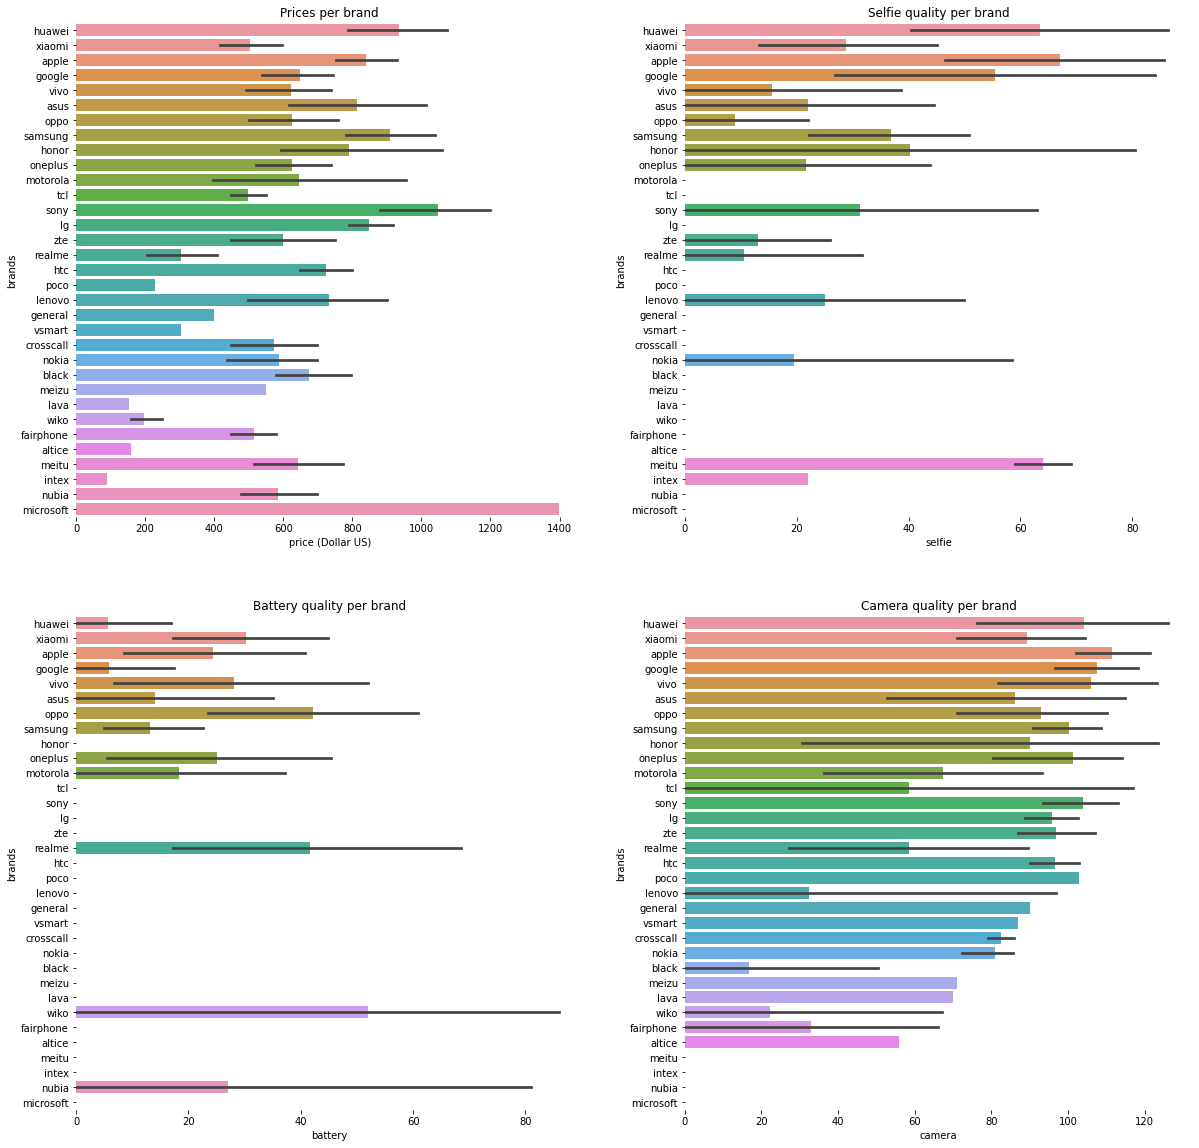

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Brand <=> Price plotting
ax[0][0].set_title("Prices per brand")
sns.barplot(x=phone['price (Dollar US)'], y=phone.brands, ax=ax[0][0])

# Selfie <=> brand plotting
ax[0][1].set_title("Selfie quality per brand")
sns.barplot(x=phone['selfie'], y=phone['brands'], ax=ax[0][1])

# Battery <=> brand plotting
ax[1][0].set_title("Battery quality per brand")
sns.barplot(x=phone['battery'], y=phone["brands"], ax=ax[1][0])

# Camera <=> brand plotting
ax[1][1].set_title("Camera quality per brand")
sns.barplot(x=phone.camera, y=phone.brands, ax=ax[1][1])

sns.despine(left=True, bottom=True)